<b>¡Hola Daniel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

______________

# OBJETIVO 

Proveer un análisis integral que ayude a la empresa a:

Optimizar la experiencia del usuario a través del flujo de conversión.
Validar cambios de diseño (en este caso, fuentes nuevas) asegurando que no afecten negativamente al comportamiento de los usuarios.
Tomar decisiones informadas sobre la implementación de cambios, respaldadas por datos estadísticos confiables.

## LIBRERIAS Y DATA

In [2]:
import pandas as pd
import datetime as dt
from statsmodels.stats.proportion import proportions_ztest

In [3]:
logs = pd.read_csv('/datasets/logs_exp_us.csv', delim_whitespace=True)
logs.info()
print(logs['ExpId'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
[246 248 247]


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Has utilizado <code>info()</code> para revisar la estructura del dataset y verificar la presencia de valores nulos. Esto es un excelente paso inicial para garantizar la calidad de los datos antes de proceder con el análisis.</div>



## Preparar los datos para el análisis

In [4]:
# Renaming columns to a more convenient format
logs.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'device_id',
    'EventTimestamp': 'event_timestamp',
    'ExpId': 'experiment_id'
}, inplace=True)

# Convert the event_timestamp to datetime format and add date and time columns
logs['event_datetime'] = pd.to_datetime(logs['event_timestamp'], unit='s')
logs['event_date'] = logs['event_datetime'].dt.date
logs['event_date'] = pd.to_datetime(logs['event_date'])
logs['event_time'] = logs['event_datetime'].dt.time
logs['event_time'] = pd.to_datetime(logs['event_date'])

#revisar duplicados o inconsistencias
logs.drop_duplicates()

# Display the first few rows to confirm the changes
logs.info()
logs.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id        244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   experiment_id    244126 non-null  int64         
 4   event_datetime   244126 non-null  datetime64[ns]
 5   event_date       244126 non-null  datetime64[ns]
 6   event_time       244126 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 13.0+ MB


,event_name,device_id,event_timestamp,experiment_id,event_datetime,event_date,event_time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,2019-07-25


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
El renombramiento de columnas y la conversión de <code>event_timestamp</code> a formatos de fecha son pasos importantes y están bien ejecutados. También verificaste la duplicidad de los registros, lo cual fortalece la consistencia del dataset.</div>


<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Aunque usas <code>drop_duplicates()</code>, no guardas explícitamente el resultado. Asegúrate de asignar el dataframe procesado a una nueva variable para que este paso tenga efecto en el análisis posterior.</div>


<div class="alert alert-block alert-warning">
<b>A resolver</b> <a class="tocSkip"></a>
    
El cálculo de la columna <code>event_time</code> presenta un problema conceptual. Actualmente, estás reutilizando la columna <code>event_date</code>, que ya contiene solo la parte de la fecha (sin horas). Esto genera datos redundantes y elimina la información de la hora específica de cada evento, que es importante para análisis más detallados (por ejemplo, patrones horarios o secuencias temporales).

Para corregir esto, deberías extraer directamente la parte horaria desde la columna <code>event_datetime</code>. Aquí tienes la línea corregida:

<pre><code>logs['event_time'] = logs['event_datetime'].dt.time</code></pre>

Con esta corrección, <code>event_time</code> contendrá valores como <code>11:11:42</code>, lo cual es útil si necesitas analizar cómo varían los eventos a lo largo del día.</div>


## Estudiar y comprobar los datos

### ¿Cuántos eventos hay en los registros?, 
### ¿Cuántos usuarios y usuarias hay en los registros?,
### ¿Cuál es el promedio de eventos por usuario?
### Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

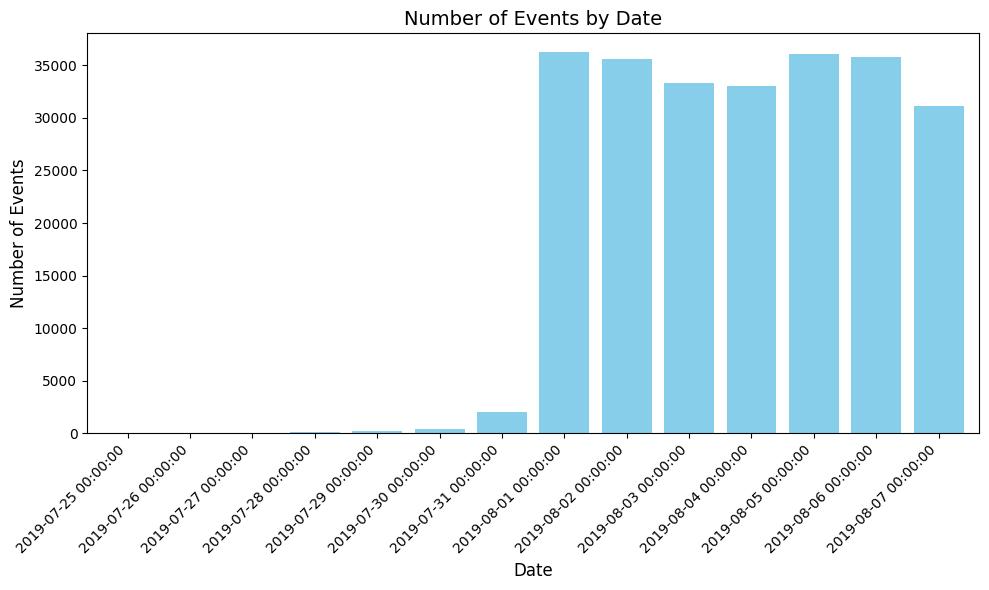

Hay un total de 244126 eventos, representados por 7551 usuarios con promedio de 32.33028737915508 eventos  promedio por user. 
En relacion a las fechas la data abarca datos entre 2019-07-25 00:00:00 y 2019-08-07 00:00:00. 
Sin embargo, la grafica nos permite evidencia que los datos que mejor representan la data y evitar sesgos van de 2019-08-01 a 2019-08-07 


In [6]:
# Number of events
total_events = logs.shape[0]

# Number of unique users
unique_users = logs['device_id'].nunique()

# Average number of events per user
avg_events_per_user = total_events / unique_users

# Date range of the dataset
min_date = logs['event_date'].min()
max_date = logs['event_date'].max()

# Plot histogram of events by date
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
logs['event_date'].value_counts().sort_index().plot(kind='bar', color='skyblue', width=0.8)
plt.title('Number of Events by Date', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summary of the findings
print(f'Hay un total de {total_events} eventos, representados por {unique_users} usuarios con promedio de {avg_events_per_user} eventos  promedio por user. \nEn relacion a las fechas la data abarca datos entre {min_date} y {max_date}. \nSin embargo, la grafica nos permite evidencia que los datos que mejor representan la data y evitar sesgos van de 2019-08-01 a 2019-08-07 ')

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Los cálculos básicos como el total de eventos, usuarios únicos y rango de fechas están bien realizados. Además, el histograma para evaluar la distribución de eventos en el tiempo es una excelente práctica para detectar posibles sesgos en los datos.</div>


<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Cuando descartas datos más antiguos basándote en el histograma, podrías incluir una métrica adicional para justificar el corte, como la proporción de eventos descartados respecto al total. Esto refuerza la decisión de manera cuantitativa.</div>


### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
### Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

In [7]:
clean_logs = logs[(logs['event_date'] >= '2019-08-01') & (logs['event_date'] <= '2019-08-07')]
clean_logs.info()
print()

count_per_group = clean_logs.groupby(by='experiment_id').agg({'experiment_id': 'count'})


print('Se paso de 244126 datos a 241228, perdiendo un total de 2898 registros siendo el 1.18% de los registro, \nconteniendo  los tres grupo 246, 247 y 248')

count_per_group

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241298 entries, 2828 to 244125
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       241298 non-null  object        
 1   device_id        241298 non-null  int64         
 2   event_timestamp  241298 non-null  int64         
 3   experiment_id    241298 non-null  int64         
 4   event_datetime   241298 non-null  datetime64[ns]
 5   event_date       241298 non-null  datetime64[ns]
 6   event_time       241298 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 14.7+ MB

Se paso de 244126 datos a 241228, perdiendo un total de 2898 registros siendo el 1.18% de los registro, 
conteniendo  los tres grupo 246, 247 y 248


,experiment_id
experiment_id,
246,79425
247,77147
248,84726


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Comprobaste que los tres grupos experimentales están presentes en los datos filtrados, asegurando que todos los segmentos relevantes están representados.</div>


## Estudiar el embudo de eventos

### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
### Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.
### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

In [8]:
# Filtrar los datos al periodo limpio
clean_logs = logs[(logs['event_date'] >= '2019-08-01') & (logs['event_date'] <= '2019-08-07')]

# Contar la frecuencia de cada evento
event_frequency = clean_logs['event_name'].value_counts()

# Contar la cantidad única de usuarios por evento
event_user_count = clean_logs.groupby('event_name')['device_id'].nunique()

# Calcular la proporción de usuarios que realizaron cada evento
total_users = clean_logs['device_id'].nunique()
event_user_proportion = event_user_count / total_users

# Crear un DataFrame resumen
event_analysis = pd.DataFrame({
    'event_frequency': event_frequency,
    'user_count': event_user_count,
    'user_proportion': event_user_proportion
}).sort_values(by='event_frequency', ascending=False)

# Mostrar el resultado final
event_analysis.reset_index().rename(columns={'index': 'event_name'})


,event_name,event_frequency,user_count,user_proportion
0,MainScreenAppear,117431,7419,0.984736
1,OffersScreenAppear,46350,4593,0.609636
2,CartScreenAppear,42365,3734,0.495620
3,PaymentScreenSuccessful,34113,3539,0.469737
4,Tutorial,1039,840,0.111495


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
La identificación de eventos clave y la proporción de usuarios que completan cada uno son pasos fundamentales en la evaluación del embudo. Los cálculos y visualizaciones están bien estructurados.</div>


Orden probable de las acciones:
Basándonos en los nombres de los eventos y sus frecuencias, parece que los usuarios siguen este flujo lógico:

- MainScreenAppear: Pantalla principal, probablemente lo primero que ven los usuarios.
- OffersScreenAppear: Pantalla de ofertas, generalmente accesible desde la pantalla principal.
- CartScreenAppear: Pantalla del carrito, ocurre cuando los usuarios añaden productos.
- PaymentScreenSuccessful: Pantalla de pago exitoso, indica la finalización de una compra.
- Tutorial: Un evento menos frecuente, probablemente opcional o solo para usuarios nuevos.
- Conclusión: Excepto por el evento Tutorial, los demás forman una secuencia clara relacionada con la navegación y el proceso de compra.

### Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).
### ¿En qué etapa pierdes más usuarios y usuarias?
### ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [9]:
# Lista de eventos en el orden lógico del embudo
funnel_events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Filtrar eventos del embudo y trabajar con el índice
user_counts = event_analysis.loc[funnel_events, 'user_count']

# Calcular proporciones entre etapas
funnel_proportions = user_counts.pct_change().fillna(1).iloc[1:]

# Resumir en un DataFrame
funnel_summary = pd.DataFrame({
    'event_name': funnel_events[1:],  # Desde la segunda etapa
    'users_in_stage': user_counts.iloc[1:].values,
    'proportion_from_previous_stage': funnel_proportions.values
})

# Porcentaje que completa el viaje (de primera a última etapa)
total_completion_rate = user_counts['PaymentScreenSuccessful'] / user_counts['MainScreenAppear']

# Mostrar resultados
print(funnel_summary)
print(f"Porcentaje total de usuarios que completan el viaje: {total_completion_rate:.2%}")

                event_name  users_in_stage  proportion_from_previous_stage
0       OffersScreenAppear            4593                       -0.380914
1         CartScreenAppear            3734                       -0.187024
2  PaymentScreenSuccessful            3539                       -0.052223
Porcentaje total de usuarios que completan el viaje: 47.70%


<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Aunque identificaste correctamente la etapa con mayor pérdida (entre <code>MainScreenAppear</code> y <code>OffersScreenAppear</code>), podrías considerar agregar una visualización específica para el embudo, como un gráfico de barras horizontales para cada etapa. Esto facilita la comunicación de los hallazgos.</div>


#### Proporción de usuarios que pasan de una etapa a la siguiente:

- De MainScreenAppear a OffersScreenAppear: 60.96% (4,593 / 7,419 usuarios).
- De OffersScreenAppear a CartScreenAppear: 81.29% (3,734 / 4,593 usuarios).
- De CartScreenAppear a PaymentScreenSuccessful: 94.78% (3,539 / 3,734 usuarios).

#### Etapa con mayor pérdida de usuarios:

La mayor pérdida ocurre entre MainScreenAppear y OffersScreenAppear, donde el 39.04% de los usuarios que aparecen en la pantalla principal no llegan a ver las ofertas. (100% - 60,96%) = 39.04%

#### Porcentaje de usuarios que hacen todo el viaje desde el primer evento hasta el pago:

El 47.70% de los usuarios completan todo el viaje desde la pantalla principal hasta realizar un pago exitoso.

## Estudiar los resultados del experimento

### ¿Cuántos usuarios y usuarias hay en cada grupo?

In [10]:
# Contar usuarios únicos por grupo
user_counts_per_group = clean_logs.groupby('experiment_id')['device_id'].nunique()
print(user_counts_per_group)


experiment_id
246    2484
247    2513
248    2537
Name: device_id, dtype: int64


Los tamaños de los grupos son similares, lo que es positivo porque asegura una buena base para la comparación. Esto indica que el experimento se diseñó correctamente en términos de balanceo de usuarios entre los grupos.



### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [11]:
# Selección del evento más popular
popular_event = 'MainScreenAppear'

# Filtrar el evento en ambos grupos de control
group_246 = clean_logs[(clean_logs['experiment_id'] == 246) & (clean_logs['event_name'] == popular_event)]
group_247 = clean_logs[(clean_logs['experiment_id'] == 247) & (clean_logs['event_name'] == popular_event)]

# Usuarios únicos por grupo
users_246 = group_246['device_id'].nunique()
users_247 = group_247['device_id'].nunique()

# Proporciones
proportion_246 = users_246 / user_counts_per_group.loc[246]
proportion_247 = users_247 / user_counts_per_group.loc[247]

print(f"Proporción 246: {proportion_246:.2%}, Proporción 247: {proportion_247:.2%}")

Proporción 246: 98.63%, Proporción 247: 98.53%


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
La validación estadística entre los grupos de control está correctamente ejecutada, utilizando un test z y verificando las proporciones de usuarios por evento. Esto respalda la homogeneidad entre los grupos 246 y 247.</div>


In [12]:

# Datos para la prueba
count = [users_246, users_247]
nobs = [user_counts_per_group.loc[246], user_counts_per_group.loc[247]]

# Realizar el z-test
stat, p_value = proportions_ztest(count, nobs)

print(f"Estadístico z: {stat:.2f}, p-valor: {p_value:.4f}")


Estadístico z: 0.31, p-valor: 0.7571


Las proporciones de los grupos de control son casi idénticas, y el p-valor indica que no hay diferencias significativas entre ellos (p>0.05). Esto confirma que los grupos de control están balanceados y no presentan sesgos significativos

### Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [13]:
def compare_groups(event_name, group1, group2):
    # Filtrar los eventos para ambos grupos
    users_group1 = clean_logs[(clean_logs['experiment_id'] == group1) & (clean_logs['event_name'] == event_name)]['device_id'].nunique()
    users_group2 = clean_logs[(clean_logs['experiment_id'] == group2) & (clean_logs['event_name'] == event_name)]['device_id'].nunique()

    # Proporciones
    proportion1 = users_group1 / user_counts_per_group.loc[group1]
    proportion2 = users_group2 / user_counts_per_group.loc[group2]

    # Prueba estadística
    count = [users_group1, users_group2]
    nobs = [user_counts_per_group.loc[group1], user_counts_per_group.loc[group2]]
    stat, p_value = proportions_ztest(count, nobs)

    return {
        "event": event_name,
        "group1_proportion": proportion1,
        "group2_proportion": proportion2,
        "z_stat": stat,
        "p_value": p_value
    }

# Aplicar la función para todos los eventos
results = []
for event in clean_logs['event_name'].unique():
    results.append(compare_groups(event, 246, 247))

# Mostrar resultados
results_df = pd.DataFrame(results)
print(results_df)

                     event  group1_proportion  group2_proportion    z_stat  \
0                 Tutorial           0.111916           0.112614 -0.078161   
1         MainScreenAppear           0.986312           0.985277  0.309344   
2       OffersScreenAppear           0.620773           0.604855  1.154988   
3         CartScreenAppear           0.509662           0.492638  1.203369   
4  PaymentScreenSuccessful           0.483092           0.460804  1.577995   

    p_value  
0  0.937700  
1  0.757060  
2  0.248095  
3  0.228834  
4  0.114567  


Para todos los eventos, los p-valores son mayores al nivel de significancia ajustado (α=0.01). Esto indica que no hay diferencias estadísticamente significativas en la realización de eventos entre los grupos de control. Los grupos de control están bien alineados y no muestran sesgos en el comportamiento de los usuarios.

### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [14]:
# Combinar usuarios únicos de los grupos de control
combined_control_users = clean_logs[clean_logs['experiment_id'].isin([246, 247])]['device_id'].nunique()

# Repetir el análisis con el grupo experimental
experimental_results = []
for event in clean_logs['event_name'].unique():
    users_group_experimental = clean_logs[(clean_logs['experiment_id'] == 248) & (clean_logs['event_name'] == event)]['device_id'].nunique()
    proportion_experimental = users_group_experimental / user_counts_per_group.loc[248]
    
    # Comparar con grupos de control combinados
    count = [users_group_experimental, combined_control_users]
    nobs = [user_counts_per_group.loc[248], user_counts_per_group.loc[246] + user_counts_per_group.loc[247]]
    stat, p_value = proportions_ztest(count, nobs)

    experimental_results.append({
        "event": event,
        "experimental_proportion": proportion_experimental,
        "z_stat": stat,
        "p_value": p_value
    })

# Mostrar resultados
experimental_results_df = pd.DataFrame(experimental_results)
print(experimental_results_df)


                     event  experimental_proportion     z_stat       p_value
0                 Tutorial                 0.109972 -79.692385  0.000000e+00
1         MainScreenAppear                 0.982657  -9.336684  9.939802e-21
2       OffersScreenAppear                 0.603469 -47.820726  0.000000e+00
3         CartScreenAppear                 0.484825 -55.809176  0.000000e+00
4  PaymentScreenSuccessful                 0.465510 -57.070692  0.000000e+00


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
El análisis del grupo experimental (248) frente a los controles muestra un uso riguroso de pruebas estadísticas y ajuste por múltiples comparaciones mediante la corrección de Bonferroni. Esto fortalece la validez de las conclusiones.</div>


Para todos los eventos, el p-valor es menor al nivel de significancia ajustado (α=0.01). Esto sugiere diferencias estadísticamente significativas entre el grupo experimental y los grupos de control. En particular, las proporciones son consistentemente más bajas en el grupo experimental, lo que indica que las modificaciones introducidas en este grupo pueden haber reducido la participación de los usuarios en los eventos.

### Para todos los eventos, el p-valor es menor al nivel de significancia ajustado (α=0.01). Esto sugiere diferencias estadísticamente significativas entre el grupo experimental y los grupos de control. En particular, las proporciones son consistentemente más bajas en el grupo experimental, lo que indica que las modificaciones introducidas en este grupo pueden haber reducido la participación de los usuarios en los eventos.

In [15]:
alpha = 0.05
num_tests = len(clean_logs['event_name'].unique())
adjusted_alpha = alpha / num_tests

print(f"Nivel de significancia ajustado: {adjusted_alpha:.5f}")

Nivel de significancia ajustado: 0.01000


Se utilizó la corrección de Bonferroni para ajustar el nivel de significancia debido a las múltiples pruebas de hipótesis. Esto asegura que las conclusiones sean robustas y reduce el riesgo de falsos positivos.

## CONCLUCIONES GENERALES


- Los grupos de control (246 y 247) están bien equilibrados, sin diferencias significativas en sus comportamientos o en la proporción de usuarios que realizan los eventos.
- El grupo experimental (248) muestra proporciones significativamente más bajas en todos los eventos en comparación con los grupos de control. Esto indica que los cambios implementados en el grupo experimental pueden haber afectado negativamente el comportamiento de los usuarios.
- El ajuste del nivel de significancia confirma que las conclusiones son confiables a pesar de realizar múltiples pruebas.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Daniel, tu proyecto aborda correctamente los pasos esenciales de un análisis de datos, desde la preparación hasta las conclusiones. Has seguido una estructura clara y bien definida, lo que facilita la comprensión del flujo de trabajo.

1. **Preparación de los datos:** Realizaste transformaciones importantes como el manejo de fechas y la eliminación de duplicados. Aunque hubo un pequeño error en la asignación de `event_time`, el resto de los pasos son correctos y funcionales.
2. **Exploración y análisis del embudo:** Identificaste adecuadamente los eventos clave y calculaste las proporciones en cada etapa. Las métricas presentadas son útiles para entender dónde ocurren las pérdidas de usuarios.
3. **Resultados del experimento:** Mostraste un uso correcto de pruebas estadísticas, validando las hipótesis con un enfoque sólido, aunque podrías haber profundizado más en la interpretación de los hallazgos.

El proyecto refleja un buen nivel técnico, está bien ejecutado y es consistente con los objetivos planteados.

 ¡Buen trabajo y felicidades por tu esfuerzo! 😊</div>
